# Question 4 - Self Organizing Map

- Given the learning rate = 0.8
- Total number of training epochs = 1000
- input samples = 24 choosen colors
- Neighbourhood distance is given

#### a. Generate a figure of the original grid (random weights) followed by figures of the SOM after 20, 40, 100, 1000 epochs. Change the value of radius = 1, 10, 30, 50, 70

### Algorithm

1. Initialise each node’s weight w_ij to a random value
2. Select a random input vector x_k
3. Repeat point 4. and 5. for all nodes in the map:
4. Compute distance using the given formula between the input vector x(t) and the weight  vector w_ij associated with the first node, where t, i, j = 0.
5. Track the node that produces the smallest distance t.
6. Find the overall Best Matching Unit (BMU), i.e. the node with the smallest distance from all calculated ones.
7. Determine topological neighbourhood βij(t) its radius σ(t) of BMU in the Kohonen Map
8. Repeat for all nodes in the BMU neighbourhood: Update the weight vector w_ij of the first node in the neighbourhood of the BMU by adding a fraction of the difference between the input vector x(t) and the weight w(t) of the neuron.
9. Repeat this whole iteration until reaching the chosen iteration limit t=n


### Implementation

In [1]:
#Importing the libraries (Without using any scikit-learn, tensorflow libraries)

import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Function to calculate the weights of the neighbors

def calculate_neigh(epoch,iteration,sigma_k,distance):
    sigma = sigma_k *(np.exp(-(epoch/iteration)))
    weights_neigh = np.exp(-((distance*distance)/(2*sigma*sigma)))
    return weights_neigh

In [3]:
#Function to find the winning neuron

def wining_neuron(weights,input,iteration,sigma_k,coor_list):
    winning_arr=np.array([])
    for epoch in range (iteration):
        for j in range (input.shape[0]):
            for i in range (weights.shape[1]):
                wn= np.sum(np.square(weights[:,i] - input[j,:]))
                winning_arr= np.append(winning_arr,wn)
            armin=np.argmin(winning_arr)
            winning_arr=np.array([])
            l_r = 0.8*np.exp(-(epoch/iteration))
            for dist in range(len(coor_list)):
              w_dist = np.sum((np.array(coor_list[dist])-
                               np.array(coor_list[armin]))**2)
              neighbours= calculate_neigh(epoch,iteration,sigma_k,w_dist)
              weights[:,dist] = weights[:,dist]+
                            (l_r*(colors[j,:]-weights[:,dist])*neighbours)
        if(epoch == 19 or epoch==39 or epoch ==99 or epoch==999):
          print("Plot at epoch =  ",epoch+1)
          a=weights.T.reshape(100,100,3)
          plt.imshow(a)
          plt.show()
    return weights

In [4]:
# Choosing the colors in the given range

colors= np.array([[153,0,0],[204,0,0],[255,0,0],[255,51,51],
                [205,92,92],[178,34,34],[255,255,0],[0,128,128],
                [255,192,203],[154,205,50],[0,128,0],[46,139,87],
                [0,0,128],
                [135,206,250],[0,0,205],[65,105,225],
                [0,191,255],
                [100,149,237],[139,0,0],
                [250,128,114],[0,10,0],
                [152,251,152],[25,25,112],[0,0,139]])

In [5]:
# Normalization 

max_val =   colors.max()
min_val =   colors.min()
colors  = (colors - min_val)/(max_val - min_val)

In [6]:
# Initializing random weights

weight_matrix= np.random.rand(3,10000)

In [7]:
# Creating the coor-list in calculating the distance

y=np.array([])
count=1
for i in range (weight_matrix.shape[1]):
    x= weight_matrix[:,i]
    x=count
    y=np.append(y,[[x]])
    count+=1
y.resize(100,100)
coor_list=[]
for j in range (len(y)):
    for k in range (len(y[j])):
        coor_list.append([j,k])

Plot at radius =  1
Plot at epoch =   20


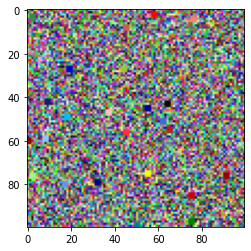

Plot at epoch =   40


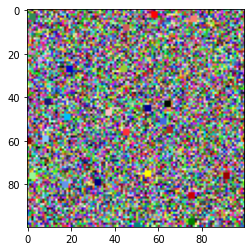

Plot at epoch =   100


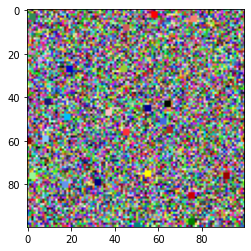

Plot at epoch =   1000


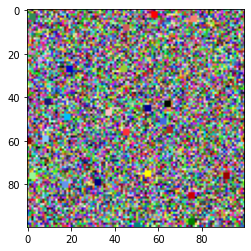

Plot at radius =  10
Plot at epoch =   20


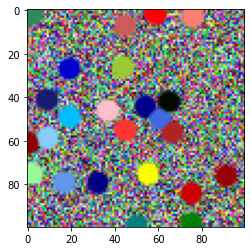

Plot at epoch =   40


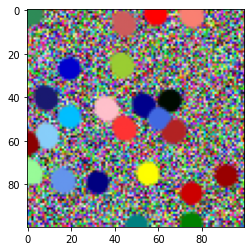

Plot at epoch =   100


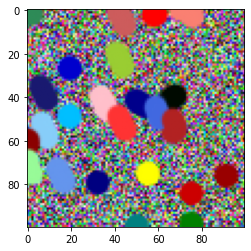

Plot at epoch =   1000


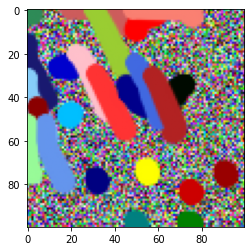

Plot at radius =  30
Plot at epoch =   20


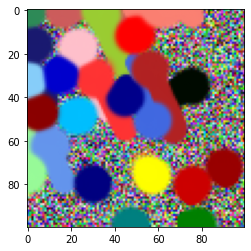

Plot at epoch =   40


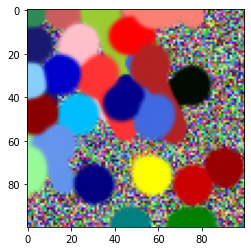

Plot at epoch =   100


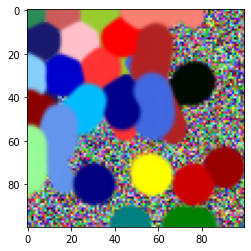

Plot at epoch =   1000


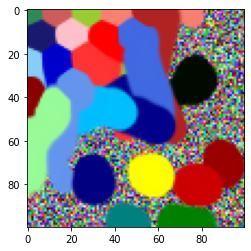

Plot at radius =  50
Plot at epoch =   20


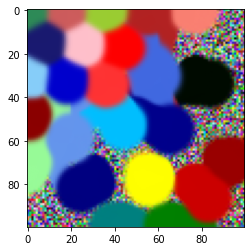

Plot at epoch =   40


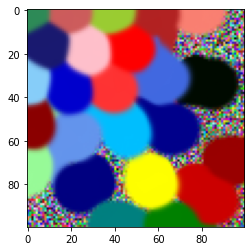

Plot at epoch =   100


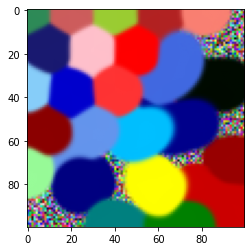

Plot at epoch =   1000


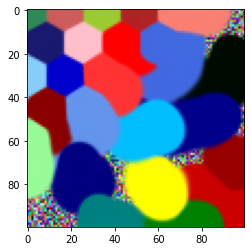

Plot at radius =  70
Plot at epoch =   20


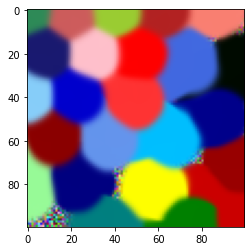

Plot at epoch =   40


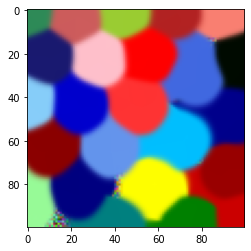

Plot at epoch =   100


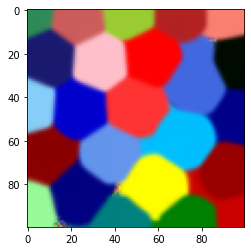

Plot at epoch =   1000


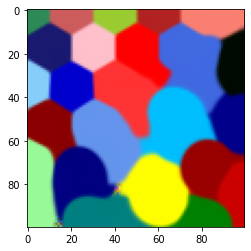

In [8]:
# Calling the function to run for 1000 epochs with given radius
radius=[1, 10, 30, 50,70]
for r in radius:
  print("Plot at radius = ",r)
  weight_test=wining_neuron(weight_matrix,colors,1000,r,coor_list)

____

#### b. Draw your conclusions on how the output changes with radius and the number of epochs

From the above implementation we can observe that the neurons become selectively tuned to various classes of input patterns during the course of the competitive learning.

- For initial inputs (where radius is 1) : The distance is calculated to form a neighbourhood with a radius of 1. So here , the clusters/classes formed are large in number. Even by inclreasing the number of epochs, they could not form proper clustering since we can find more similar colors being randomly placed over the grid. 

- For later inputs (where radius is 10,30,50) : The inputs are being trained and sorted in their neighbourhood with a increase in cluster size compared to the ones with radius =1. Here, the inputs formed their neighbourhood by entering into their respective similar clusters. Increasing the number of epochs resulted in training more accurately and calculating a better neighbourhood.

- For Final input (where radius is 70) : We can find almost all the inputs are clustered into thier respective clases by increase in overlapping all the similar colors and almost all the input got into thier neighbourhood compared to the above outputs by increasing the epochs from 20 to 1000. It looks like a proper clustered map.

#### Therefore from all the above observations, the self organizing map clusered the inputs better forming a converged map with more number of epochs and high radius compared to less number of epochs and low radius value. 